# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [66]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from sklearn.cluster import KMeans 
pd.set_option('display.max_rows', 20)

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [67]:
data = pd.read_csv("Categorical.csv")
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


Remove the duplicate index column from the dataset. 

In [68]:
data_removed = data.iloc[:,1:4]
data_removed

,Longitude,Latitude,continent
0,-69.982677,12.520880,North America
1,66.004734,33.835231,Asia
2,17.537368,-12.293361,Africa
3,-63.064989,18.223959,North America
4,20.049834,41.142450,Europe
...,...,...,...
236,-172.164851,-13.753243,Oceania
237,47.586762,15.909280,Asia
238,25.083901,-29.000341,Africa
239,27.774759,-13.458242,Africa


## Map the data

Use the <i>'continent'</i> category for this analysis.

In [69]:
data_mapped = data_removed.copy() 
data_mapped["continent"] = data_mapped["continent"].map({'Europe':0 , 'Africa':1 , 'Asia':2 , 'Oceania':3 , 'North America':4 
                                                         ,'South America':5 , 'Seven seas (open ocean)':6, 'Antarctica': 7})
data_mapped

,Longitude,Latitude,continent
0,-69.982677,12.520880,4
1,66.004734,33.835231,2
2,17.537368,-12.293361,1
3,-63.064989,18.223959,4
4,20.049834,41.142450,0
...,...,...,...
236,-172.164851,-13.753243,3
237,47.586762,15.909280,2
238,25.083901,-29.000341,1
239,27.774759,-13.458242,1


## Select the features


In [70]:
x = data_mapped.iloc[:,2:3]
x

,continent
0,4
1,2
2,1
3,4
4,0
...,...
236,3
237,2
238,1
239,1


## Clustering

Use 4 clusters initially.

In [71]:
kmeans = KMeans(4)
kmeans.fit(x)

C:\Users\Salih\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Salih\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

## Clustering results

In [72]:
identified_clusters = kmeans.fit_predict(x)


C:\Users\Salih\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Salih\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Plot the data

In [76]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters


,Longitude,Latitude,continent,Cluster
0,-69.982677,12.520880,4,2
1,66.004734,33.835231,2,3
2,17.537368,-12.293361,1,1
3,-63.064989,18.223959,4,2
4,20.049834,41.142450,0,1
...,...,...,...,...
236,-172.164851,-13.753243,3,2
237,47.586762,15.909280,2,3
238,25.083901,-29.000341,1,1
239,27.774759,-13.458242,1,1


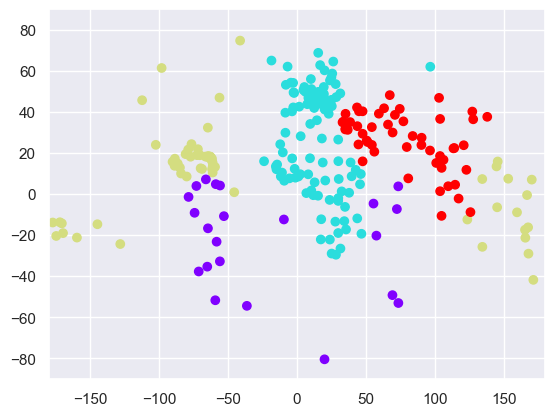

In [78]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()


Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.